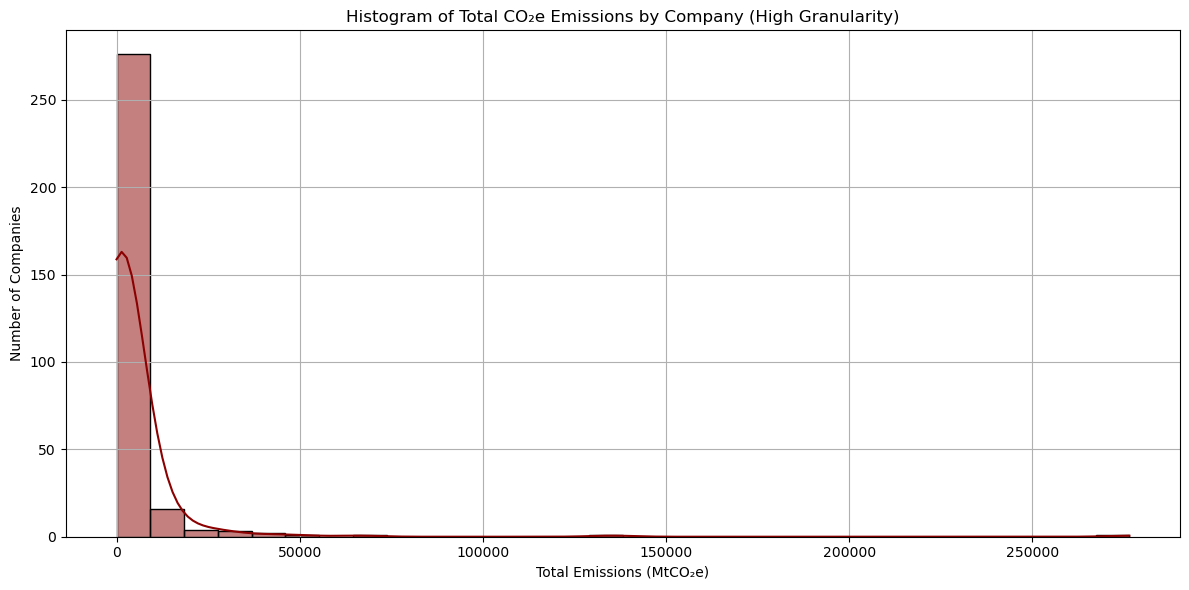

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#HISTOGRAM OF EMISSIONS BY COMPANY (HIGH GRANULARITY) - Carbons Major Emissions Dataset

# Load High Granularity Emissions Data
df = pd.read_csv("emissions_high_granularity.csv")

# Group by "Reporting Entity" and Sum Total Emissions
company_emissions = df.groupby('reporting_entity')['total_emissions_MtCO2e'].sum().sort_values(ascending=False)

# Plot Histogram
plt.figure(figsize=(12, 6))
sns.histplot(company_emissions, bins=30, kde=True, color='darkred')
plt.title("Histogram of Total CO₂e Emissions by Company (High Granularity)")
plt.xlabel("Total Emissions (MtCO₂e)")
plt.ylabel("Number of Companies")
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
from scipy.stats import pearsonr

df = pd.read_csv("emissions_high_granularity.csv")
df.columns = df.columns.str.strip()

# Filter for Natural Gas
df_gas = df[df['commodity'].str.lower() == 'natural gas']

# Drop Missing Values
df_gas = df_gas.dropna(subset=['production_value', 'total_emissions_MtCO2e', 'year', 'reporting_entity'])

# Group by Year and Reporting Entity
df_grouped = df_gas.groupby(['year', 'reporting_entity']).agg({
    'production_value': 'sum',
    'total_emissions_MtCO2e': 'sum'
}).reset_index()

# Check for Sufficient Data
print("Rows after grouping:", len(df_grouped))
print(df_grouped.head())

# Calculate Correlation
if len(df_grouped) >= 2:
    r, p = pearsonr(df_grouped['production_value'], df_grouped['total_emissions_MtCO2e'])
    print(f"Correlation (r): {r:.2f}, p-value: {p:.4f}")
else:
    print("Not enough data after grouping to compute correlation.")

Rows after grouping: 4755
   year            reporting_entity  production_value  total_emissions_MtCO2e
0  1900  Standard Oil of New Jersey           6.14400                0.447839
1  1900    Standard Oil of New York           3.13344                0.228398
2  1901  Standard Oil of New Jersey           8.64000                0.629773
3  1901    Standard Oil of New York           4.40640                0.321184
4  1902  Standard Oil of New Jersey           9.88800                0.720740
Correlation (r): 1.00, p-value: 0.0000


In [43]:
df_grouped['ratio'] = df_grouped['total_emissions_MtCO2e'] / df_grouped['production_value']
print(df_grouped['ratio'].describe())
print(df_grouped['ratio'].nunique())

count    4.754000e+03
mean     7.289039e-02
std      2.425682e-15
min      7.289039e-02
25%      7.289039e-02
50%      7.289039e-02
75%      7.289039e-02
max      7.289039e-02
Name: ratio, dtype: float64
34


C:\Users\micha\AppData\Local\Temp\ipykernel_23524\3914351893.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gas['date'] = pd.to_datetime(df_gas['date'])


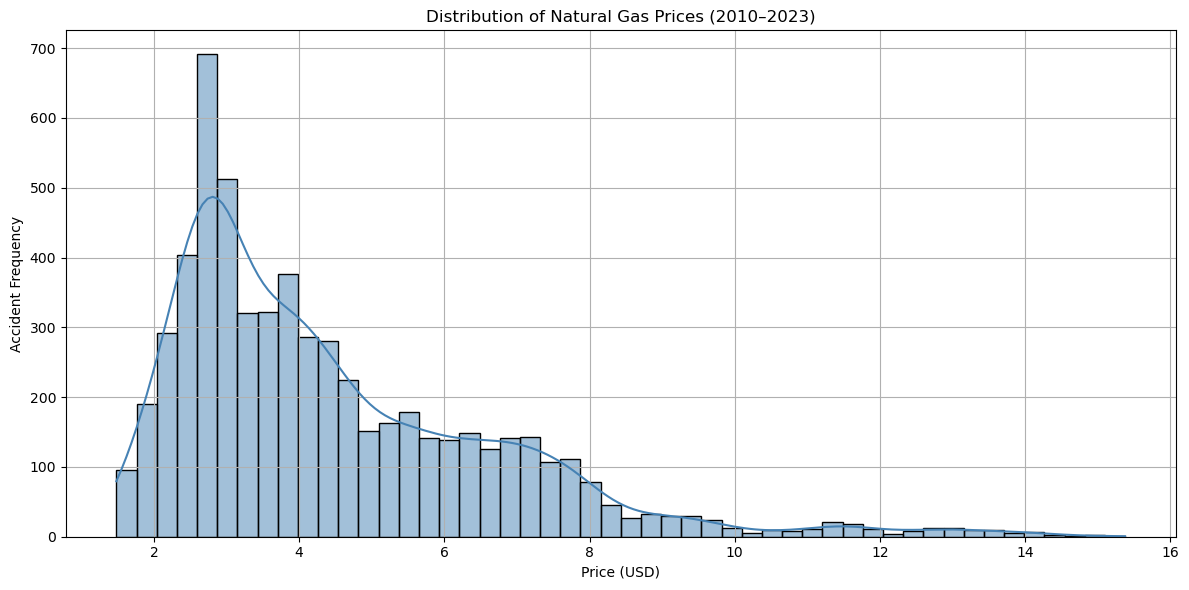

In [32]:
#TIME SERIES OF NATURAL GAS PRICES (BIMODAL DISTRIBUTION) - Fuels Future Dataset

df_prices = pd.read_csv("all_fuels_data.csv")
df_gas = df_prices[df_prices['commodity'] == 'Natural Gas']

# Ensure 'date' is Datetime
df_gas['date'] = pd.to_datetime(df_gas['date'])

# Plot Price Distribution (bimodal)
plt.figure(figsize=(12, 6))
sns.histplot(df_gas['close'], bins=50, kde=True, color='steelblue') #'close' is the final market closing price
plt.title("Distribution of Natural Gas Prices (2010–2023)")
plt.xlabel("Price (USD)")
plt.ylabel("Accident Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
df = pd.read_csv("all_fuels_data.csv")

# Filter for natural gas
df_gas = df[df['commodity'].str.lower().str.contains("natural gas")]

# Drop NA values
df_gas = df_gas.dropna(subset=['close', 'volume'])

# Calculate correlation
r, p = pearsonr(df_gas['close'], df_gas['volume'])
print(f"Correlation (r): {r:.2f}, p-value: {p:.4f}")

Correlation (r): -0.47, p-value: 0.0000


In [28]:
# Scatterplot of Accident Frequency vs. Total Volume Spilled per Operator - Pipleline Accidents Dataset

df = pd.read_csv("pipeline_accidents.csv")

# Clean Column Names by Stripping Whitespace / Strange Characters
df.columns = df.columns.str.strip()

print(df.columns.tolist())

print(df[['Operator Name', 'Unintentional Release (Barrels)']].head())

['Report Number', 'Supplemental Number', 'Accident Year', 'Accident Date/Time', 'Operator ID', 'Operator Name', 'Pipeline/Facility Name', 'Pipeline Location', 'Pipeline Type', 'Liquid Type', 'Liquid Subtype', 'Liquid Name', 'Accident City', 'Accident County', 'Accident State', 'Accident Latitude', 'Accident Longitude', 'Cause Category', 'Cause Subcategory', 'Unintentional Release (Barrels)', 'Intentional Release (Barrels)', 'Liquid Recovery (Barrels)', 'Net Loss (Barrels)', 'Liquid Ignition', 'Liquid Explosion', 'Pipeline Shutdown', 'Shutdown Date/Time', 'Restart Date/Time', 'Public Evacuations', 'Operator Employee Injuries', 'Operator Contractor Injuries', 'Emergency Responder Injuries', 'Other Injuries', 'Public Injuries', 'All Injuries', 'Operator Employee Fatalities', 'Operator Contractor Fatalities', 'Emergency Responder Fatalities', 'Other Fatalities', 'Public Fatalities', 'All Fatalities', 'Property Damage Costs', 'Lost Commodity Costs', 'Public/Private Property Damage Costs', '

True


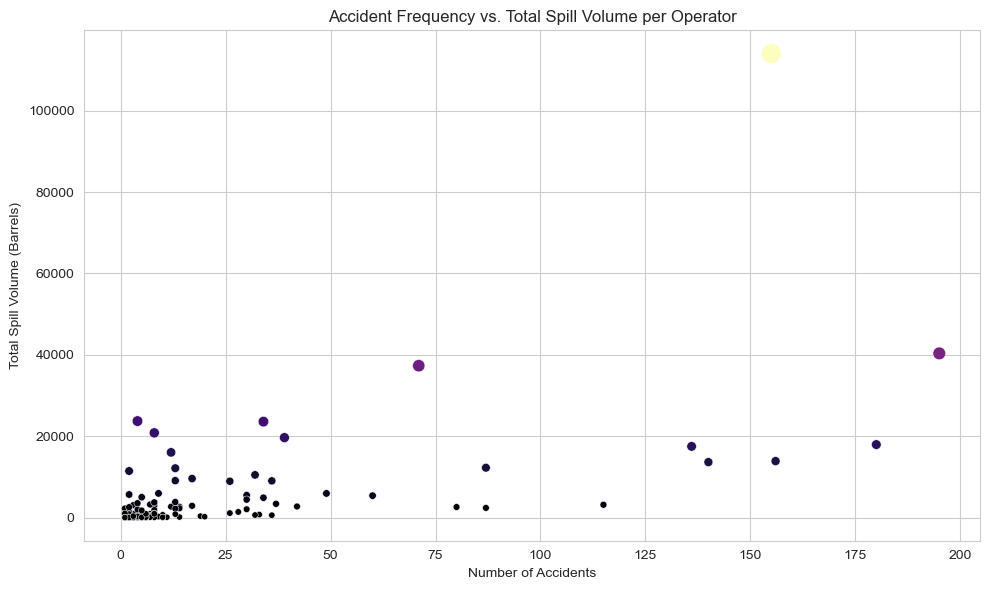

In [48]:
# Scatterplot_1: Accident Frequency vs. Total Volume Spilled per Operator - Pipeline Accidents Dataset

df_accidents = pd.read_csv("pipeline_accidents.csv")

df.columns = df.columns.str.strip()

print("Operator Name" in df.columns)

# Drop Rows Where Operator Name or Spill Volume is Missing
df_clean = df.dropna(subset=['Operator Name', 'Unintentional Release (Barrels)'])

# Group and Aggregate
operator_stats = df_clean.groupby('Operator Name').agg({
    'Unintentional Release (Barrels)': 'sum',
    'Report Number': 'count'
}).rename(columns={
    'Unintentional Release (Barrels)': 'Total Spill Volume',
    'Report Number': 'Accident Count'
})

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=operator_stats,
    x='Accident Count',
    y='Total Spill Volume',
    hue='Total Spill Volume',
    palette='magma',
    size='Total Spill Volume',
    sizes=(20, 200),
    legend=False
)
plt.title("Accident Frequency vs. Total Spill Volume per Operator")
plt.xlabel("Number of Accidents")
plt.ylabel("Total Spill Volume (Barrels)")
plt.grid(True)
plt.tight_layout()
plt.show()

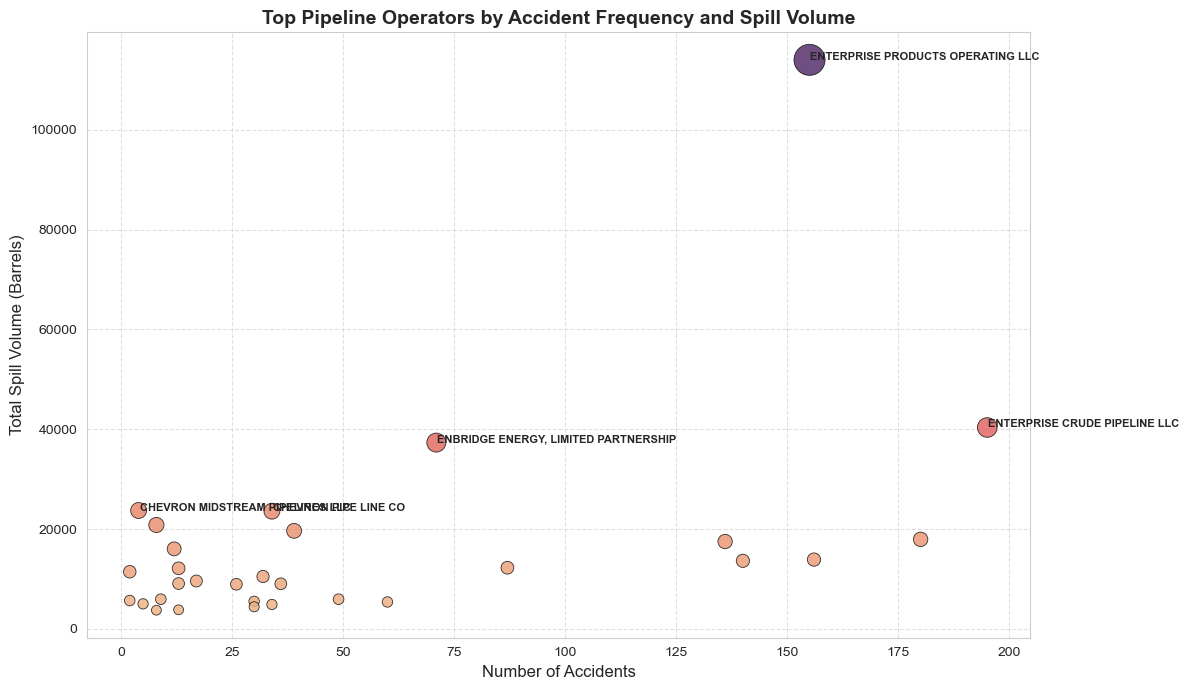

In [47]:
# Scatterplot_2: Accident Frequency vs. Total Volume Spilled per Operator - Pipeline Accidents Dataset

import seaborn as sns

# Load and Clean Data
df = pd.read_csv("pipeline_accidents.csv")
df.columns = df.columns.str.strip()

# Drop Missing Values
df_clean = df.dropna(subset=['Operator Name', 'Unintentional Release (Barrels)'])

# Group by Operator
operator_stats = df_clean.groupby('Operator Name').agg({
    'Unintentional Release (Barrels)': 'sum',
    'Report Number': 'count'
}).rename(columns={
    'Unintentional Release (Barrels)': 'Total Spill Volume',
    'Report Number': 'Accident Count'
}).reset_index()

# Filter to Top 30 for Better Visual Clarity
top_operators = operator_stats.sort_values('Total Spill Volume', ascending=False).head(30)

# Plot
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

scatter = sns.scatterplot(
    data=top_operators,
    x='Accident Count',
    y='Total Spill Volume',
    hue='Total Spill Volume',
    size='Total Spill Volume',
    palette='flare',
    sizes=(50, 500),
    alpha=0.8,
    edgecolor='black',
    legend=False
)

# Annotate Top Few Points
for i, row in top_operators.head(5).iterrows():
    plt.text(row['Accident Count'] + 0.2, row['Total Spill Volume'],
             row['Operator Name'], fontsize=8, weight='bold')

plt.title("Top Pipeline Operators by Accident Frequency and Spill Volume", fontsize=14, weight='bold')
plt.xlabel("Number of Accidents", fontsize=12)
plt.ylabel("Total Spill Volume (Barrels)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [38]:
df = pd.read_csv("pipeline_accidents.csv")

df.columns = df.columns.str.strip()

# Drop Missing Data
df_clean = df.dropna(subset=['Operator Name', 'Unintentional Release (Barrels)'])

# Group by Operator
grouped = df_clean.groupby('Operator Name').agg({
    'Report Number': 'count',
    'Unintentional Release (Barrels)': 'sum'
}).rename(columns={
    'Report Number': 'Accident Count',
    'Unintentional Release (Barrels)': 'Total Spill Volume'
})

# Calculate Correlation
r, p = pearsonr(grouped['Accident Count'], grouped['Total Spill Volume'])
print(f"Correlation (r): {r:.2f}, p-value: {p:.4f}")

Correlation (r): 0.63, p-value: 0.0000
